# Programa para resolver la ecuacion de onda en 2D (espaciales).
## Creditos:
* Johathan Quiroz Laverde
* José Manuel Vergara Álvarez




In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# exportar las gráficas a ventanas
# %matplotlib qt


In [2]:
def wave2Ds_t(a, b, c, d, v, p, q, r, s, m, n, t0, nx, ny, nt, dt):
    # a -> Limite inferior en x
    # b -> Limite superior en x
    # c -> Limite inferior en y
    # d -> Limite superior en y
    # v -> Funcion de velocidad de la onda v(x, y)
    # p -> Condicion de frontera en a
    # q -> Condicion de frontera en b
    # r -> Condicion de frontera en c
    # s -> Condicion de frontera en d
    # m -> Condicion inicial
    # n -> Derivada de la condicion inicial
    # t0 -> Tiempo inicial
    # nx -> Numero de particiones en x
    # ny -> Numero de particiones en y
    # nt -> Numero de particiones en tiempo
    # dt -> Espaciado temporal

    # Hallamos la velocidad maxima
    x = np.linspace(a, b, nx)
    y = np.linspace(c, d, ny)
    vmax = max(v(posx, posy) for posx, posy in zip(x, y))

    # Hallamos tamaño de la caja
    Lx = b - a
    Ly = d - c

    # Hallamos dx y dy
    dx = Lx / (nx - 1.0)
    dy = Ly / (ny - 1.0)

    # Hallamos constantes
    alpha = vmax * dt/dx
    beta = vmax * dt/dy

    # Condicion de estabilidad
    stab_cond = 1.0/np.sqrt(2.0)

    # Probamos estabilidad
    if alpha >= stab_cond or beta >= stab_cond:
        print("Error: la condición de estabilidad fue violada")
        print("    alpha = %5.2f y beta = %5.2f" %(alpha, beta))
        print("    deben ser menores que 1.0")
        return

    # Hallamos tiempo maximo
    tmax = nt * dt
    t = np.arange(t0, tmax, dt)

    # Inicializamos matriz
    w = np.zeros((nx, ny, nt), dtype = float)

    # Condiciones iniciales
    for i in range(nx):
        for j in range(ny):
            w[i, j, 0] = m(x[i], y[i])

    # Condiciones de frontera
    for k in range(nt):
        for j in range(ny):
            w[0, j, k] = p(y[j], t[k])
            w[nx - 1, j, k] = q(y[j], t[k])

        for i in range(nx):
            w[i, 0, k] = r(x[i], t[k])
            w[i, ny - 1, k] = s(x[i], t[k])

    # Resolvemos
    for k in range(1, nt):
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                if k == 1:
                    aux = 0.5
                    w_ij_1 = 2.0 * dt * n(x[i], y[j])
                else:
                    aux = 1.0
                    w_ij_1 = w[i, j, k - 2]

                alpha = v(x[i], y[j]) * dt/dx
                beta = v(x[i], y[j]) * dt/dy

                w[i, j, k] = aux * (alpha**2 * (w[i + 1, j, k -1] +
                        w[i - 1, j, k - 1]) + beta**2 * (w[i, j + 1, k - 1] +
                        w[i, j - 1, k - 1]) + 2.0 * (1 - alpha**2 - beta**2) *
                        w[i, j, k - 1] - w_ij_1 +
                        v(x[i], y[j])**2 * dt**2 * g(i, j, t[k]))


    return w

In [3]:
# Limites en x y y
a = 0.0
b = 1.0 # km

c = 0.0
d = 1.0 # km

# Valores iniciales
t0 = 0.0
nx = 301
ny = 301
nt = 1001
dt = 0.0005

# Velocidad
def v(x, y):
    if x < 0.2 :
        return 1.0
    else:
        return 4.0 # km/s

# Condiciones de frontera
def p(y, t):
    return 0.0

def q(y, t):
    return 0.0

def r(x, t):
    return 0.0

def s(x, t):
    return 0.0

# Condiciones iniciales
def m(x, y):
    return 0.0

def n(x, y):
    return 0.0

# Fuente
def g(i, j, t):
    if i == (nx - 1) / 2 -1 and j == (ny - 1) / 2 - 1:
        f = 30.0 # Hz
        return (1.0 - 2.0*np.pi**2*f**2*t**2)*np.exp(-np.pi**2*f**2*t**2)
    else:
        return 0

In [4]:
w = wave2Ds_t(a, b, c, d, v, p, q, r, s, m, n, t0, nx, ny, nt, dt)

## Capturas de campo de onda en $100,200, \cdots 800$ milisegundos
Se observan los frentes de onda circulares. Reflexiones de la capa de contraste
donde la velocidad cambia de 1 a 4 km/s, así también como reflexiones de los bordes del modelo.

301 301 90601


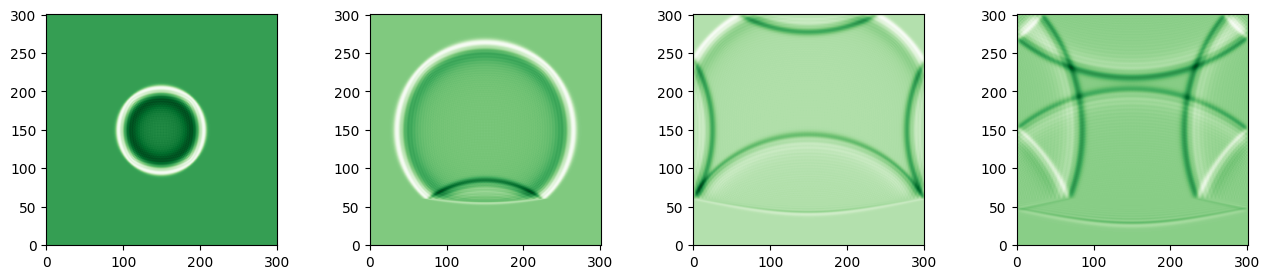

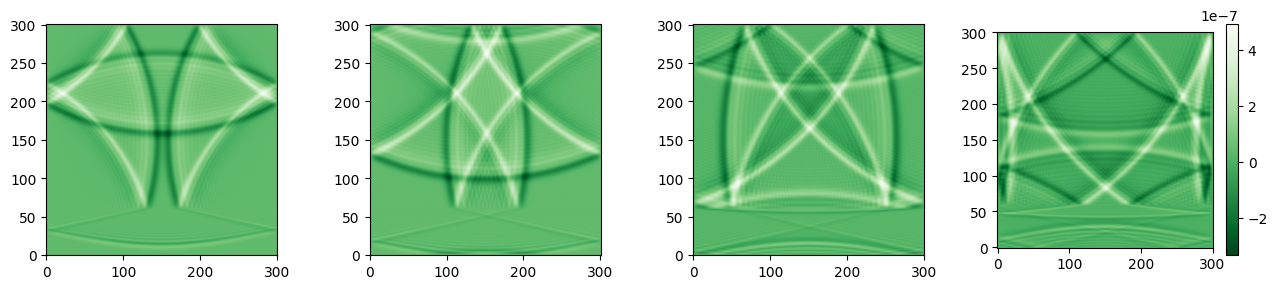

In [5]:
# Make the plot

# export to a window
# %matplotlib qt
import numpy as np

x = np.linspace(a,b,nx)
y = np.linspace(c,d,ny)

w1=w[:,:,100]
w2=w[:,:,200]
w3=w[:,:,300]
w4=w[:,:,400]

# Inicializamos matriz
data= np.zeros((nx, ny), dtype = np.float32)

newFile=open("binarywave","wb")
for i in range(nx):
    for j in range(ny):
        # print(i,j)
        data[i,j]=np.float32(w2[i,j])


print(nx,ny,nx*ny)
newFile.write(data)

newFile.close
X,Y = np.meshgrid(x,y)
Z1=w1
Z2=w2
Z3=w3
Z4=w4

# puede poner varias figuras una al lado de la otra. Aca solo 1
fig,(ax1,ax2,ax3,ax4) = plt.subplots(figsize=(16, 3), ncols=4)

p1 = ax1.imshow(Z1, cmap=plt.cm.Greens_r,origin='lower')
p2 = ax2.imshow(Z2, cmap=plt.cm.Greens_r,origin='lower')
p3 = ax3.imshow(Z3, cmap=plt.cm.Greens_r,origin='lower')
p4 = ax4.imshow(Z4, cmap=plt.cm.Greens_r,origin='lower')


#fig.colorbar(p4, ax=ax4)


w1=w[:,:,500]
w2=w[:,:,600]
w3=w[:,:,700]
w4=w[:,:,800]


X,Y = np.meshgrid(x,y)
Z1=w1
Z2=w2
Z3=w3
Z4=w4

# puede poner varias figuras una al lado de la otra. Aca solo 1
fig,(ax1,ax2,ax3,ax4) = plt.subplots(figsize=(16, 3), ncols=4)

p1 = ax1.imshow(Z1, cmap=plt.cm.Greens_r,origin='lower')
p2 = ax2.imshow(Z2, cmap=plt.cm.Greens_r,origin='lower')
p3 = ax3.imshow(Z3, cmap=plt.cm.Greens_r,origin='lower')
p4 = ax4.imshow(Z4, cmap=plt.cm.Greens_r,origin='lower')





fig.colorbar(p4, ax=ax4)

plt.show()

## Animación en gráficos de densidades*



Terminado


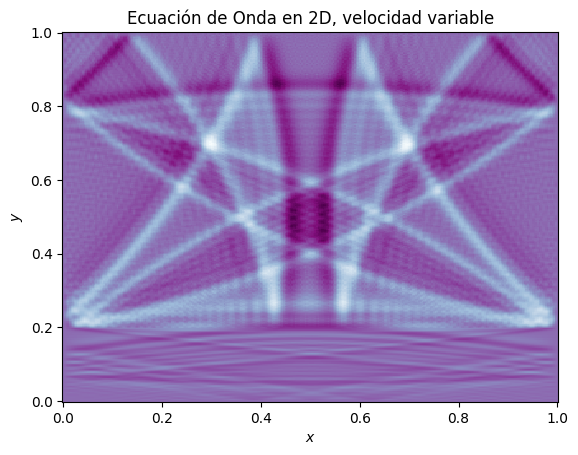

In [6]:
fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1, 1, 1)

A = []
t = []

step = 2
t0 = 0
L = 1.0
Nt = int(nt / step)

for i in range(Nt):
    j = i * step
    value = w[:, :, j]
    t.append(t0)
    t0 += dt * step
    A.append(value)


k = 0

x = np.linspace(a, b, nx)
y = np.linspace(c, d, ny)

X, Y = np.meshgrid(x, y)

mytitle="Ecuación de Onda en 2D, velocidad variable"
labelx="$x$"  # realmente los ejes están intercambiados.
labely="$y$"

def animate(i):
    global k
    Z = A[k]
    k += 1
    ax1.clear()
    plt.title(mytitle)
    plt.xlabel(labelx)
    plt.ylabel(labely)

    plt.pcolormesh(X, Y, Z, cmap = cm.BuPu)

anim = animation.FuncAnimation(fig, animate, frames = Nt - 2, interval = 20)
#anim.save("wave2D_t.mp4", fps = 10, extra_args = ["-vcodec", "libx264"])
# save as gif
anim.save("wave2D.gif", dpi=80, writer='imagemagick')



print ("Terminado")